In [35]:
from sklearn import svm

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [85]:
data=pd.read_csv("/Users/mortezaabyadeh/Desktop/Covid Data.csv")

In [86]:
data["DEATH"] = [2 if each=="9999-99-99" else 1 for each in data.DATE_DIED]

In [87]:
data1=data.copy()
data2=data1.copy()

In [88]:
data2.PREGNANT = data2.PREGNANT.replace(97.2)

In [89]:
data2.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [90]:
data2 = data2[(data2.PREGNANT == 1) | (data2.PREGNANT == 2)]


In [91]:
data6 = data1[data1['CLASIFFICATION_FINAL'].isin([1, 2, 3])]


In [92]:
data6 = data6[(data6.PNEUMONIA == 1) | (data6.PNEUMONIA == 2)]
data6 = data6[(data6.DIABETES == 1) | (data6.DIABETES == 2)]
data6 = data6[(data6.COPD == 1) | (data6.COPD == 2)]
data6 = data6[(data6.ASTHMA == 1) | (data6.ASTHMA == 2)]
data6 = data6[(data6.INMSUPR == 1) | (data6.INMSUPR == 2)]
data6 = data6[(data6.HIPERTENSION == 1) | (data6.HIPERTENSION == 2)]
data6 = data6[(data6.OTHER_DISEASE == 1) | (data6.OTHER_DISEASE == 2)]
data6 = data6[(data6.CARDIOVASCULAR == 1) | (data6.CARDIOVASCULAR == 2)]
data6 = data6[(data6.OBESITY == 1) | (data6.OBESITY == 2)]
data6 = data6[(data6.RENAL_CHRONIC == 1) | (data6.RENAL_CHRONIC == 2)]
data6 = data6[(data6.TOBACCO == 1) | (data6.TOBACCO == 2)]

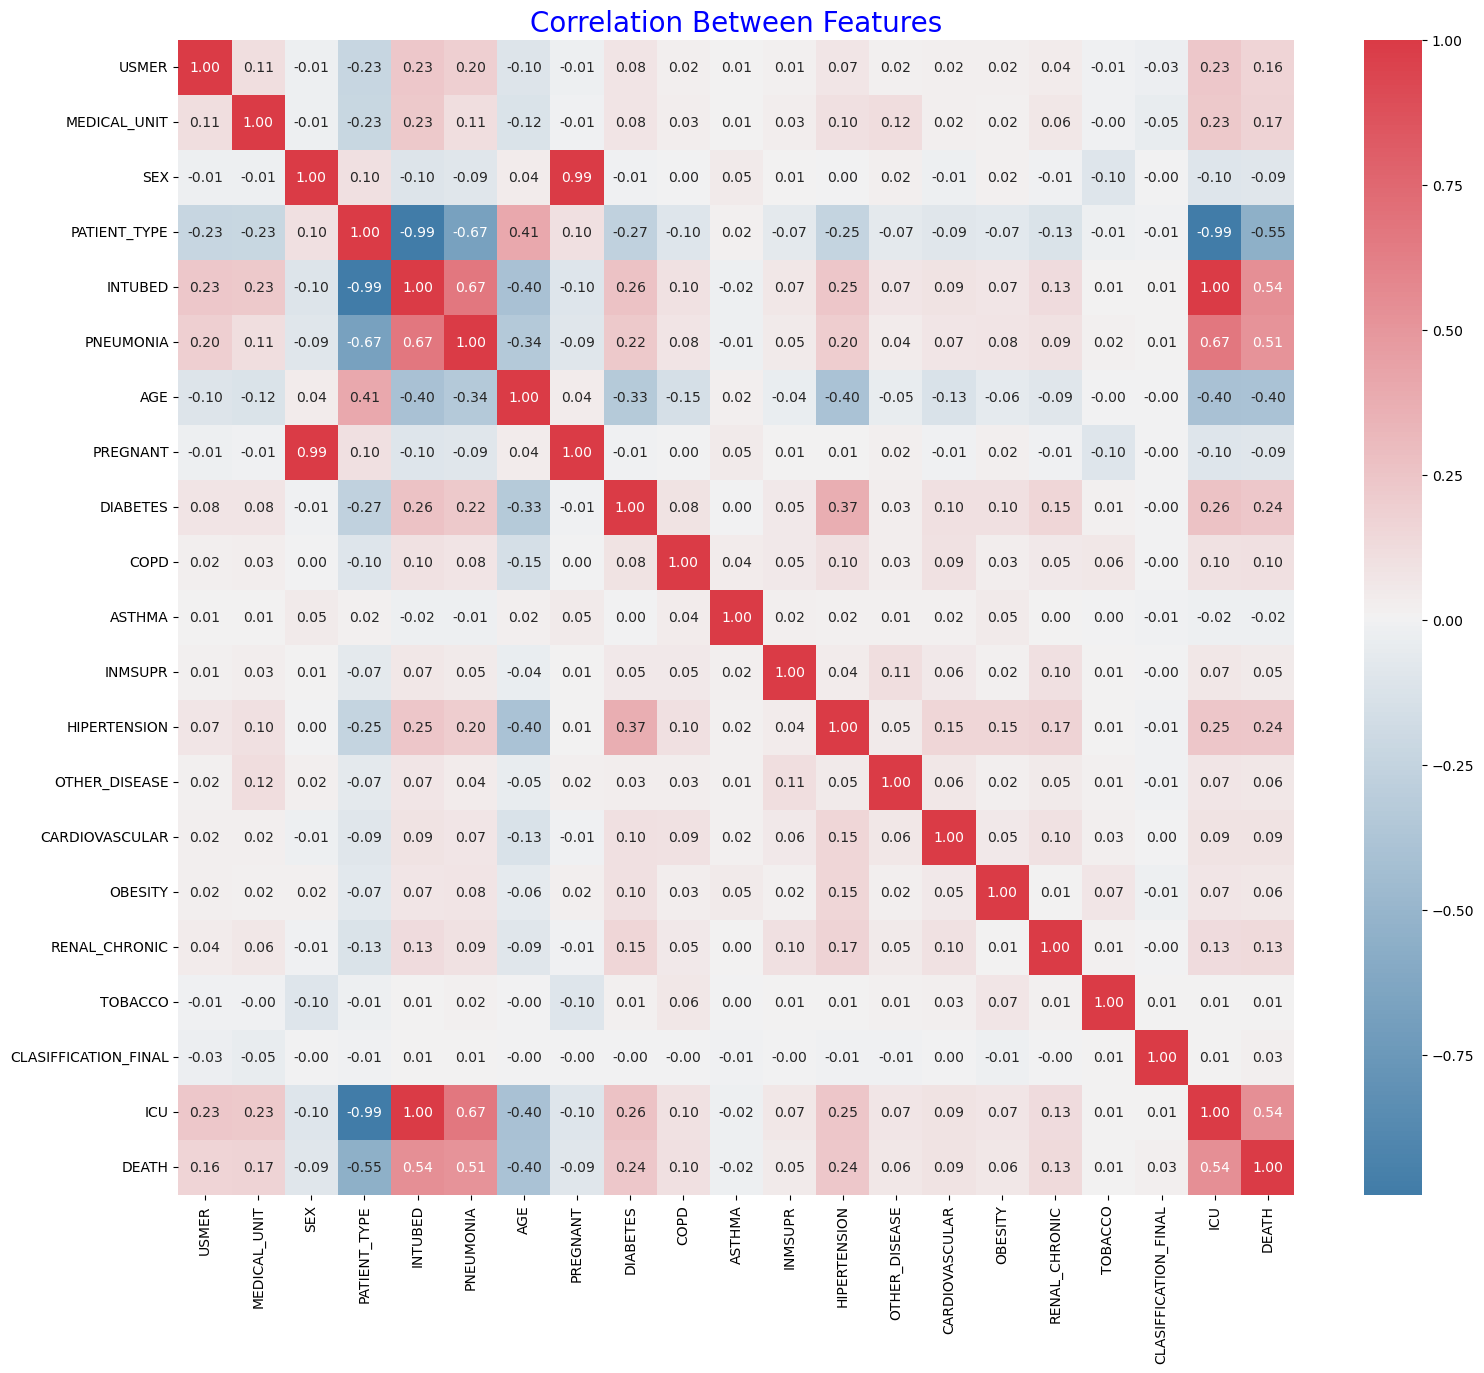

In [93]:
corr = data6.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True)

plt.figure(figsize=(18, 15))

sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap)

plt.title("Correlation Between Features", fontsize=20, color="blue")

plt.show()

In [94]:
data6.shape

(388878, 22)

In [95]:
remove = ['DATE_DIED']
data6.drop(columns=remove, inplace=True)

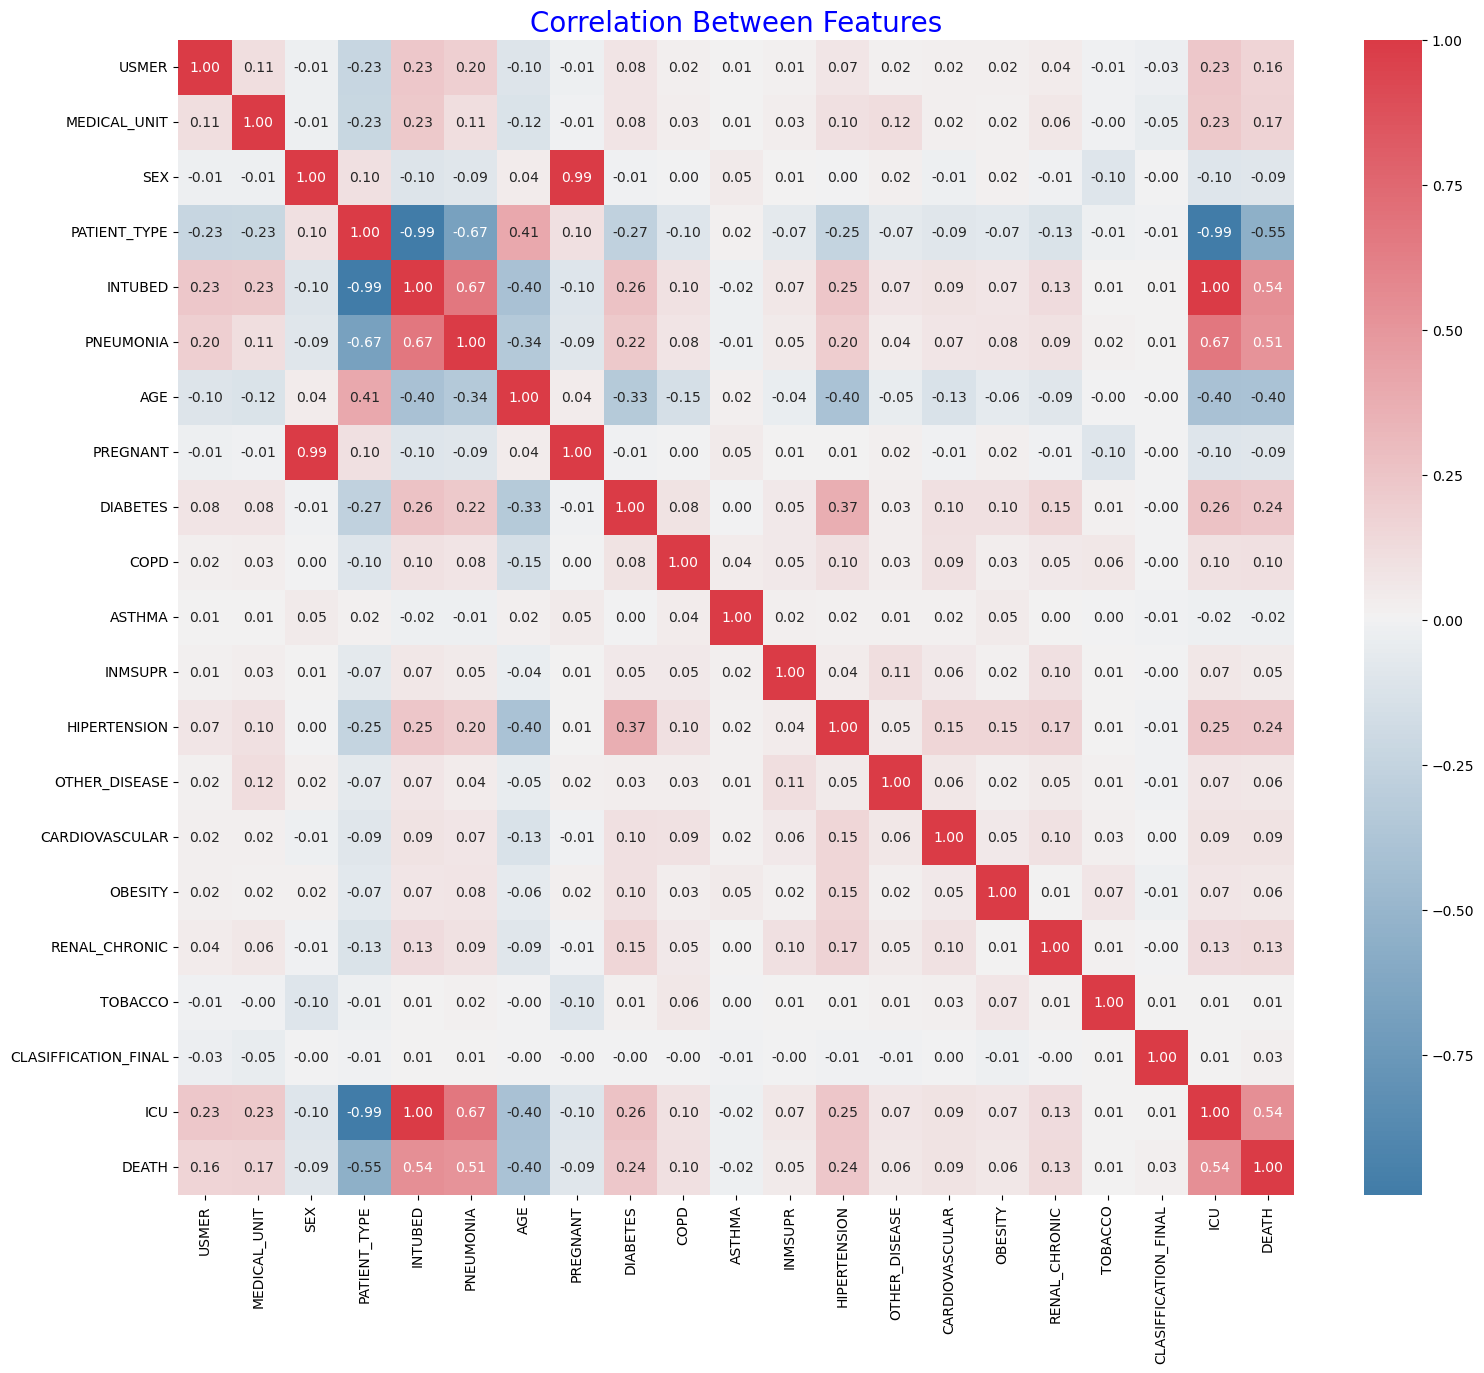

In [96]:
corr = data6.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True)

plt.figure(figsize=(18, 15))

sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap)

plt.title("Correlation Between Features", fontsize=20, color="blue")

plt.show()

In [97]:
data7 = data6.copy()

In [98]:
x = data6.drop(columns="DEATH")
y = data6["DEATH"]

In [99]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (311102, 20)
Test_x : (77776, 20)
Train_y : (311102,)
Test_y : (77776,)


In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.907233593910718


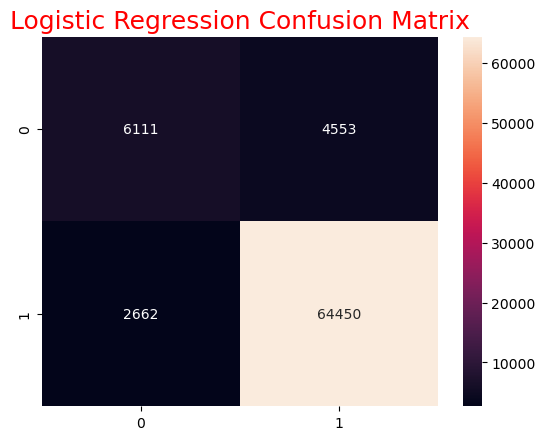

In [101]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

In [105]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

cm = confusion_matrix(test_y, logreg.predict(test_x))
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(test_y, logreg.predict(test_x)))

fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

Confusion Matrix:
 [[ 6111  4553]
 [ 2662 64450]]

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.57      0.63     10664
           2       0.93      0.96      0.95     67112

    accuracy                           0.91     77776
   macro avg       0.82      0.77      0.79     77776
weighted avg       0.90      0.91      0.90     77776



ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [103]:
from sklearn import svm

In [24]:
clf = svm.SVC(kernel='rbf')
 